In [ ]:
import torch
from torch import nn

## Самостоятельная реализация свертки

In [ ]:
def corr2d(X, K):
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i: i + h, j: j + w] * K).sum()
    return Y

In [ ]:
X = torch.Tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
K = torch.Tensor([[0, 1], [2, 3]])
corr2d(X, K)

tensor([[19., 25.],
        [37., 43.]])

## Детекция граней

In [ ]:
X = torch.ones((6, 8))
X[:, 2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [ ]:
## вертикальные грани есть
K = torch.Tensor([[1, -1]])
Y = corr2d(X, K)
print(X)
print(Y)

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])
tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])


In [ ]:
Y.reshape(1, 1, 6, 7)

tensor([[[[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
          [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
          [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
          [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
          [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
          [ 0.,  1.,  0.,  0.,  0., -1.,  0.]]]])

In [ ]:
K

tensor([[ 1., -1.]])

In [ ]:
## вертикальных граней нет
Z = corr2d(X.T, K)
print(X.T)
print(Z)

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


## Сверточный слой

In [ ]:
X = X.reshape(1, 1, 6, 8)
Y = Y.reshape(1, 1, 6, 7)

In [ ]:
X,Y

(tensor([[[[1., 1., 0., 0., 0., 0., 1., 1.],
           [1., 1., 0., 0., 0., 0., 1., 1.],
           [1., 1., 0., 0., 0., 0., 1., 1.],
           [1., 1., 0., 0., 0., 0., 1., 1.],
           [1., 1., 0., 0., 0., 0., 1., 1.],
           [1., 1., 0., 0., 0., 0., 1., 1.]]]]),
 tensor([[[[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
           [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
           [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
           [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
           [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
           [ 0.,  1.,  0.,  0.,  0., -1.,  0.]]]]))

In [ ]:
conv2d(X)

tensor([[[[-1.6332e-05,  9.9802e-01,  2.0881e-05,  2.0881e-05,  2.0881e-05,
           -9.9801e-01, -1.6332e-05],
          [-1.6332e-05,  9.9802e-01,  2.0881e-05,  2.0881e-05,  2.0881e-05,
           -9.9801e-01, -1.6332e-05],
          [-1.6332e-05,  9.9802e-01,  2.0881e-05,  2.0881e-05,  2.0881e-05,
           -9.9801e-01, -1.6332e-05],
          [-1.6332e-05,  9.9802e-01,  2.0881e-05,  2.0881e-05,  2.0881e-05,
           -9.9801e-01, -1.6332e-05],
          [-1.6332e-05,  9.9802e-01,  2.0881e-05,  2.0881e-05,  2.0881e-05,
           -9.9801e-01, -1.6332e-05],
          [-1.6332e-05,  9.9802e-01,  2.0881e-05,  2.0881e-05,  2.0881e-05,
           -9.9801e-01, -1.6332e-05]]]], grad_fn=<ConvolutionBackward0>)

In [ ]:
conv2d = torch.nn.Conv2d(1, 1, (1,2))

In [ ]:
trainer = torch.optim.SGD(conv2d.parameters(), lr=0.001)

In [ ]:
criterion = nn.MSELoss(reduction='sum')

In [ ]:
for i in range(500):
    trainer.zero_grad()
    Y_hat = conv2d(X)
    l = criterion(Y_hat,Y)
    l.backward()
    trainer.step()
    if (i + 1) % 2 == 0:
        print('batch %d, loss %.3f' % (i + 1, l.item()))

batch 2, loss 16.529
batch 4, loss 14.244
batch 6, loss 12.641
batch 8, loss 11.454
batch 10, loss 10.528
batch 12, loss 9.768
batch 14, loss 9.119
batch 16, loss 8.547
batch 18, loss 8.032
batch 20, loss 7.561
batch 22, loss 7.126
batch 24, loss 6.721
batch 26, loss 6.343
batch 28, loss 5.988
batch 30, loss 5.656
batch 32, loss 5.343
batch 34, loss 5.049
batch 36, loss 4.772
batch 38, loss 4.512
batch 40, loss 4.266
batch 42, loss 4.034
batch 44, loss 3.816
batch 46, loss 3.610
batch 48, loss 3.416
batch 50, loss 3.233
batch 52, loss 3.060
batch 54, loss 2.897
batch 56, loss 2.743
batch 58, loss 2.598
batch 60, loss 2.461
batch 62, loss 2.331
batch 64, loss 2.208
batch 66, loss 2.093
batch 68, loss 1.983
batch 70, loss 1.880
batch 72, loss 1.782
batch 74, loss 1.689
batch 76, loss 1.602
batch 78, loss 1.519
batch 80, loss 1.441
batch 82, loss 1.367
batch 84, loss 1.297
batch 86, loss 1.230
batch 88, loss 1.167
batch 90, loss 1.108
batch 92, loss 1.051
batch 94, loss 0.998
batch 96, lo

In [ ]:
print(conv2d.weight)
print(conv2d.bias)

Parameter containing:
tensor([[[[ 0.9980, -0.9980]]]], requires_grad=True)
Parameter containing:
tensor([2.0881e-05], requires_grad=True)


## Padding и stride

In [ ]:
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=(1,0)) # 1 - количество входных каналов, 1 - кол-во выходных
X = torch.randn((1, 1, 8, 8)) # 1 - размер батча (пакета)(здесь 1 - одна картинка), 1 - кол-во каналов, 8,8 - размер картинки
conv2d(X).shape

torch.Size([1, 1, 8, 6])

In [ ]:
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1, stride=2)
X = torch.randn((1, 1, 8, 8))
conv2d(X).shape

torch.Size([1, 1, 4, 4])

## Каналы

In [ ]:
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1)
X = torch.randn((1, 1, 8, 8))
conv2d(X).shape

torch.Size([1, 1, 8, 8])

In [ ]:
conv2d.weight.shape # размерность весов
# 1 - одна свертка, 1 - свертка однаканальная, 3,3 - размер свертки

torch.Size([32, 4, 3, 3])

In [ ]:
conv2d = nn.Conv2d(4, 32, kernel_size=3, padding=1)
X = torch.randn((1, 4, 8, 8))
conv2d(X).shape

torch.Size([1, 32, 8, 8])

In [ ]:
conv2d.weight.shape
# получили 32 - свертки, 4 - каждая свертка 4-х канальная, 3,3 - размер свертки

torch.Size([32, 4, 3, 3])

## Pooling

In [ ]:
def pool2d(X, pool_size, mode='max'):
    p_h, p_w = pool_size
    Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j] = X[i: i + p_h, j: j + p_w].max()
            elif mode == 'avg':
                Y[i, j] = X[i: i + p_h, j: j + p_w].mean()
    return Y

In [ ]:
X = torch.Tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print(X)
print(pool2d(X, (2, 2))) # выбирает max значение (по умолчанию)

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])
tensor([[4., 5.],
        [7., 8.]])


In [ ]:
pool2d(X, (2, 2), 'avg') # выбирает среднее значение

tensor([[2., 3.],
        [5., 6.]])

In [ ]:
X = torch.arange(16).reshape((1, 1, 4, 4)).type(torch.float)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

**puling из Torch:**

In [ ]:
pool2d = nn.MaxPool2d(3) # если 1 цифра, говорит, что размер ядра 3х3 и stride = 3
pool2d(X)

tensor([[[[10.]]]])

In [ ]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [ ]:
pool2d = nn.MaxPool2d((2, 3), padding=(1, 1), stride=(2, 3))
pool2d(X)

tensor([[[[ 1.,  3.],
          [ 9., 11.],
          [13., 15.]]]])

In [ ]:
X = torch.cat((X, X + 1), dim=1)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [ ]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])

## Lenet

In [ ]:
import torchvision as tv
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
BATCH_SIZE=256

In [ ]:
train_dataset = tv.datasets.MNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.MNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



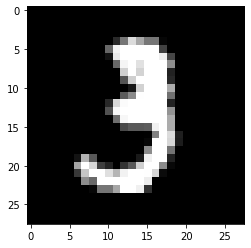

In [ ]:
plt.imshow(train_dataset[10][0].numpy().reshape(28,28), cmap='gray')

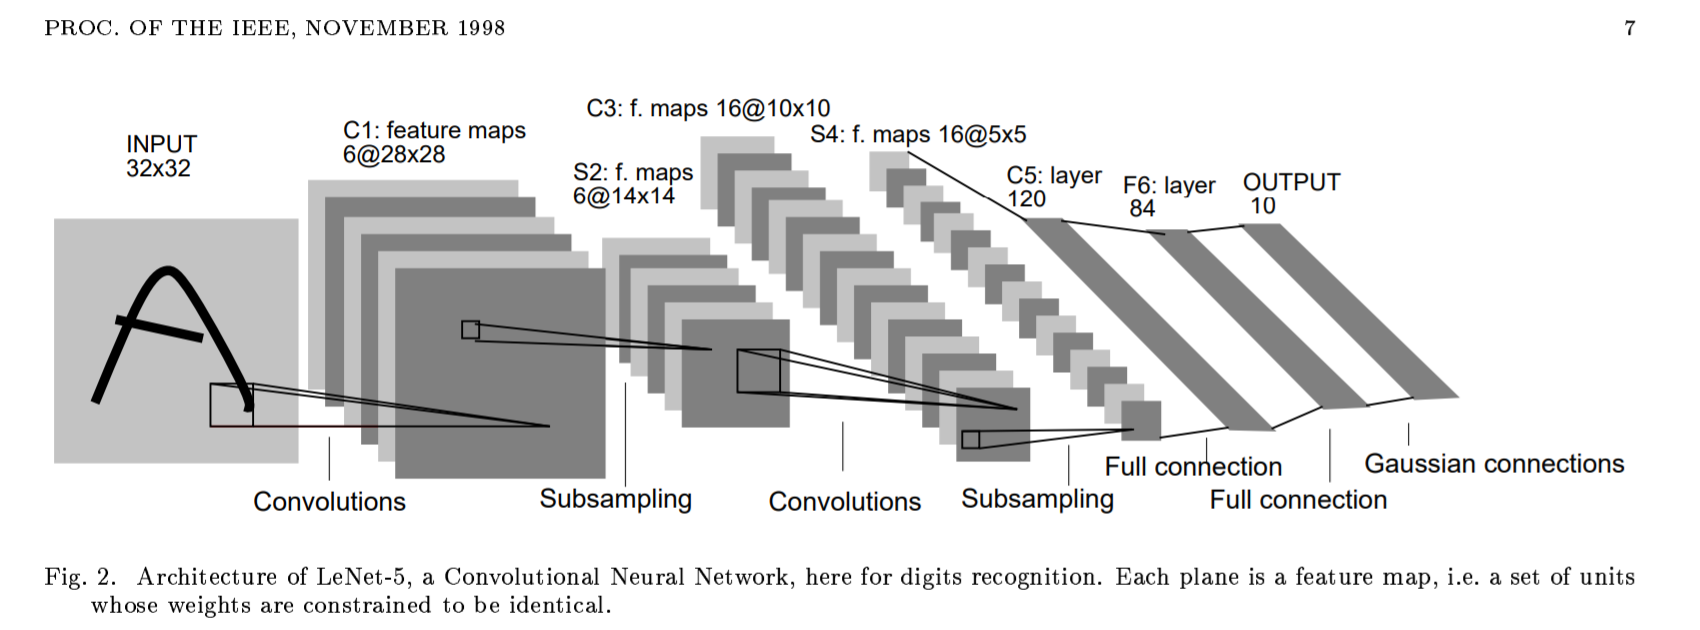

In [ ]:
model = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(2, stride=2),
    nn.Conv2d(6, 12, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(2, stride=2),
    nn.Flatten(),
    nn.Linear(300, 50),
    nn.ReLU(),
    nn.Linear(50, 10)
)

In [ ]:
X = train_dataset[0][0]
X = X.reshape(1, 1, 28, 28)
print(X.shape)
for l in model:
    X = l(X)
    print("Layer {}. X shape: {}".format(l, X.shape))

torch.Size([1, 1, 28, 28])
Layer Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)). X shape: torch.Size([1, 6, 28, 28])
Layer ReLU(). X shape: torch.Size([1, 6, 28, 28])
Layer MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False). X shape: torch.Size([1, 6, 14, 14])
Layer Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1)). X shape: torch.Size([1, 12, 10, 10])
Layer ReLU(). X shape: torch.Size([1, 12, 10, 10])
Layer MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False). X shape: torch.Size([1, 12, 5, 5])
Layer Flatten(start_dim=1, end_dim=-1). X shape: torch.Size([1, 300])
Layer Linear(in_features=300, out_features=50, bias=True). X shape: torch.Size([1, 50])
Layer ReLU(). X shape: torch.Size([1, 50])
Layer Linear(in_features=50, out_features=10, bias=True). X shape: torch.Size([1, 10])


In [ ]:
X = train_dataset[0][0]
X = X.reshape(1, 1, 28, 28)
y = model(X)
print(y.shape)

torch.Size([1, 10])


In [ ]:
# функция выводи accuracy
def evaluate_accuracy(data_iter, net):
    acc_sum, n = torch.Tensor([0]), 0
    for X, y in data_iter:
        acc_sum += (net(X).argmax(axis=1) == y).sum()
        n += y.shape[0]
    return acc_sum.item() / n

In [ ]:
def train(net, train_iter, test_iter, trainer, num_epochs):
    loss = nn.CrossEntropyLoss(reduction='sum')
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()
        for X, y in train_iter:
            trainer.zero_grad()
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            trainer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f, '
              'time %.1f sec'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc,
                 time.time() - start))

In [ ]:
lr, num_epochs = 0.001, 5
trainer = torch.optim.SGD(model.parameters(), lr=lr)
train(model, train_iter, test_iter, trainer, num_epochs)

epoch 1, loss 0.8203, train acc 0.732, test acc 0.958, time 14.0 sec
epoch 2, loss 0.1144, train acc 0.965, test acc 0.970, time 14.4 sec
epoch 3, loss 0.0823, train acc 0.975, test acc 0.977, time 14.2 sec
epoch 4, loss 0.0669, train acc 0.979, test acc 0.979, time 14.4 sec
epoch 5, loss 0.0575, train acc 0.982, test acc 0.981, time 17.4 sec


## Обучение на GPU

In [ ]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [ ]:
dev

device(type='cuda')

In [ ]:
model = model.to(dev)

In [ ]:
def train(net, train_iter, test_iter, trainer, num_epochs, dev):
    loss = nn.CrossEntropyLoss(reduction='sum')
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()
        for X, y in train_iter:
            trainer.zero_grad()
            X, y = X.to(dev), y.to(dev) # отправляем данные на GPU
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            trainer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]
        test_acc = evaluate_accuracy(test_iter, net, dev)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f, '
              'time %.1f sec'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc,
                 time.time() - start))

In [ ]:
def evaluate_accuracy(data_iter, net, dev):
    acc_sum, n = torch.Tensor([0]).to(dev), 0
    for X, y in data_iter:
        X, y = X.to(dev), y.to(dev) # отправляем данные на GPU
        acc_sum += (net(X).argmax(axis=1) == y).sum()
        n += y.shape[0]
    return acc_sum.item() / n

In [ ]:
lr, num_epochs = 0.001, 5
trainer = torch.optim.SGD(model.parameters(), lr=lr)
train(model, train_iter, test_iter, trainer, num_epochs, dev)

epoch 1, loss 0.0317, train acc 0.991, test acc 0.985, time 6.3 sec
epoch 2, loss 0.0292, train acc 0.991, test acc 0.985, time 6.8 sec
epoch 3, loss 0.0273, train acc 0.992, test acc 0.984, time 7.2 sec
epoch 4, loss 0.0252, train acc 0.993, test acc 0.985, time 7.3 sec
epoch 5, loss 0.0238, train acc 0.993, test acc 0.985, time 6.3 sec
